In [26]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import src.visualization as vs

In [27]:
data = pd.read_csv('data/raw/kickstarter.csv')

In [28]:
date_columns = ['created_at','deadline','launched_at','state_changed_at']
for column in date_columns:
    data[column] = data[column].apply(dt.datetime.fromtimestamp)

In [59]:
data[date_columns].describe()

C:\Users\jbeil\AppData\Local\Temp\ipykernel_17444\2076803750.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data[date_columns].describe()


,created_at,deadline,launched_at,state_changed_at
count,209222,209222,209222,209222
unique,182158,170854,182109,172048
top,2018-04-03 23:24:20,2018-07-04 05:59:00,2017-06-12 17:59:10,2018-07-04 05:59:00
freq,4,56,4,56
first,2009-04-22 04:11:10,2009-05-03 08:59:59,2009-04-24 21:52:03,2009-05-03 09:00:17
last,2019-03-14 02:25:26,2019-05-13 06:12:20,2019-03-14 05:12:20,2019-03-14 05:12:21


In [50]:
# pls dont blame me for this

launch_to_deadline = (data['deadline'] - data['launched_at']).dt.round('1min')
create_to_deadline = (data['deadline'] - data['created_at']).dt.round('1min')
creation_to_launch = (data['launched_at'] - data['created_at']).dt.round('1min')

launch_to_deadline_days = launch_to_deadline.dt.days
launch_to_deadline_minutes = launch_to_deadline.dt.seconds // 60

create_to_deadline_days = create_to_deadline.dt.days
create_to_deadline_minutes = create_to_deadline.dt.seconds // 60

creation_to_launch_days = creation_to_launch.dt.days
creation_to_launch_minutes = creation_to_launch.dt.seconds // 60

time_df = pd.concat([launch_to_deadline_days, launch_to_deadline_minutes,
                     create_to_deadline_days, create_to_deadline_minutes,
                     creation_to_launch_days, creation_to_launch_minutes],
                    axis=1,
                    keys = ['launch_to_deadline_days', 'launch_to_deadline_minutes',
                            'create_to_deadline_days', 'create_to_deadline_minutes',
                            'creation_to_launch_days', 'creation_to_launch_minutes'])

In [57]:
vs.nice_summary(time_df)

# sns.histplot(data=time_df, x='launch_to_deadline')

# it looks like projects can be created but not immediately launched
# once a project is launched there is a maximum funding time of 93 days (3 months)

# when do people launch their projects?
# when are they more likely to postpone the launch?

,Columns,Dtype,nunique,Non-Null Count,Missing,Missing %,Zero Count,mean,std,min,25%,50%,75%,max
0,launch_to_deadline_days,int64,93,209222,-,-,0,32.53,11.86,1.0,29.0,30.0,34.0,93.0
1,launch_to_deadline_minutes,int64,1440,209222,-,-,127120,277.94,469.13,0.0,0.0,0.0,417.0,1439.0
2,create_to_deadline_days,int64,1497,209222,-,-,0,79.91,132.12,1.0,33.0,47.0,72.0,3333.0
3,create_to_deadline_minutes,int64,1440,209222,-,-,2727,665.60,474.31,0.0,211.0,613.0,1128.0,1439.0
4,creation_to_launch_days,int64,1452,209222,-,-,28452,47.16,131.31,0.0,2.0,11.0,36.0,3303.0
5,creation_to_launch_minutes,int64,1440,209222,-,-,207,701.12,477.47,0.0,224.0,698.0,1164.0,1439.0


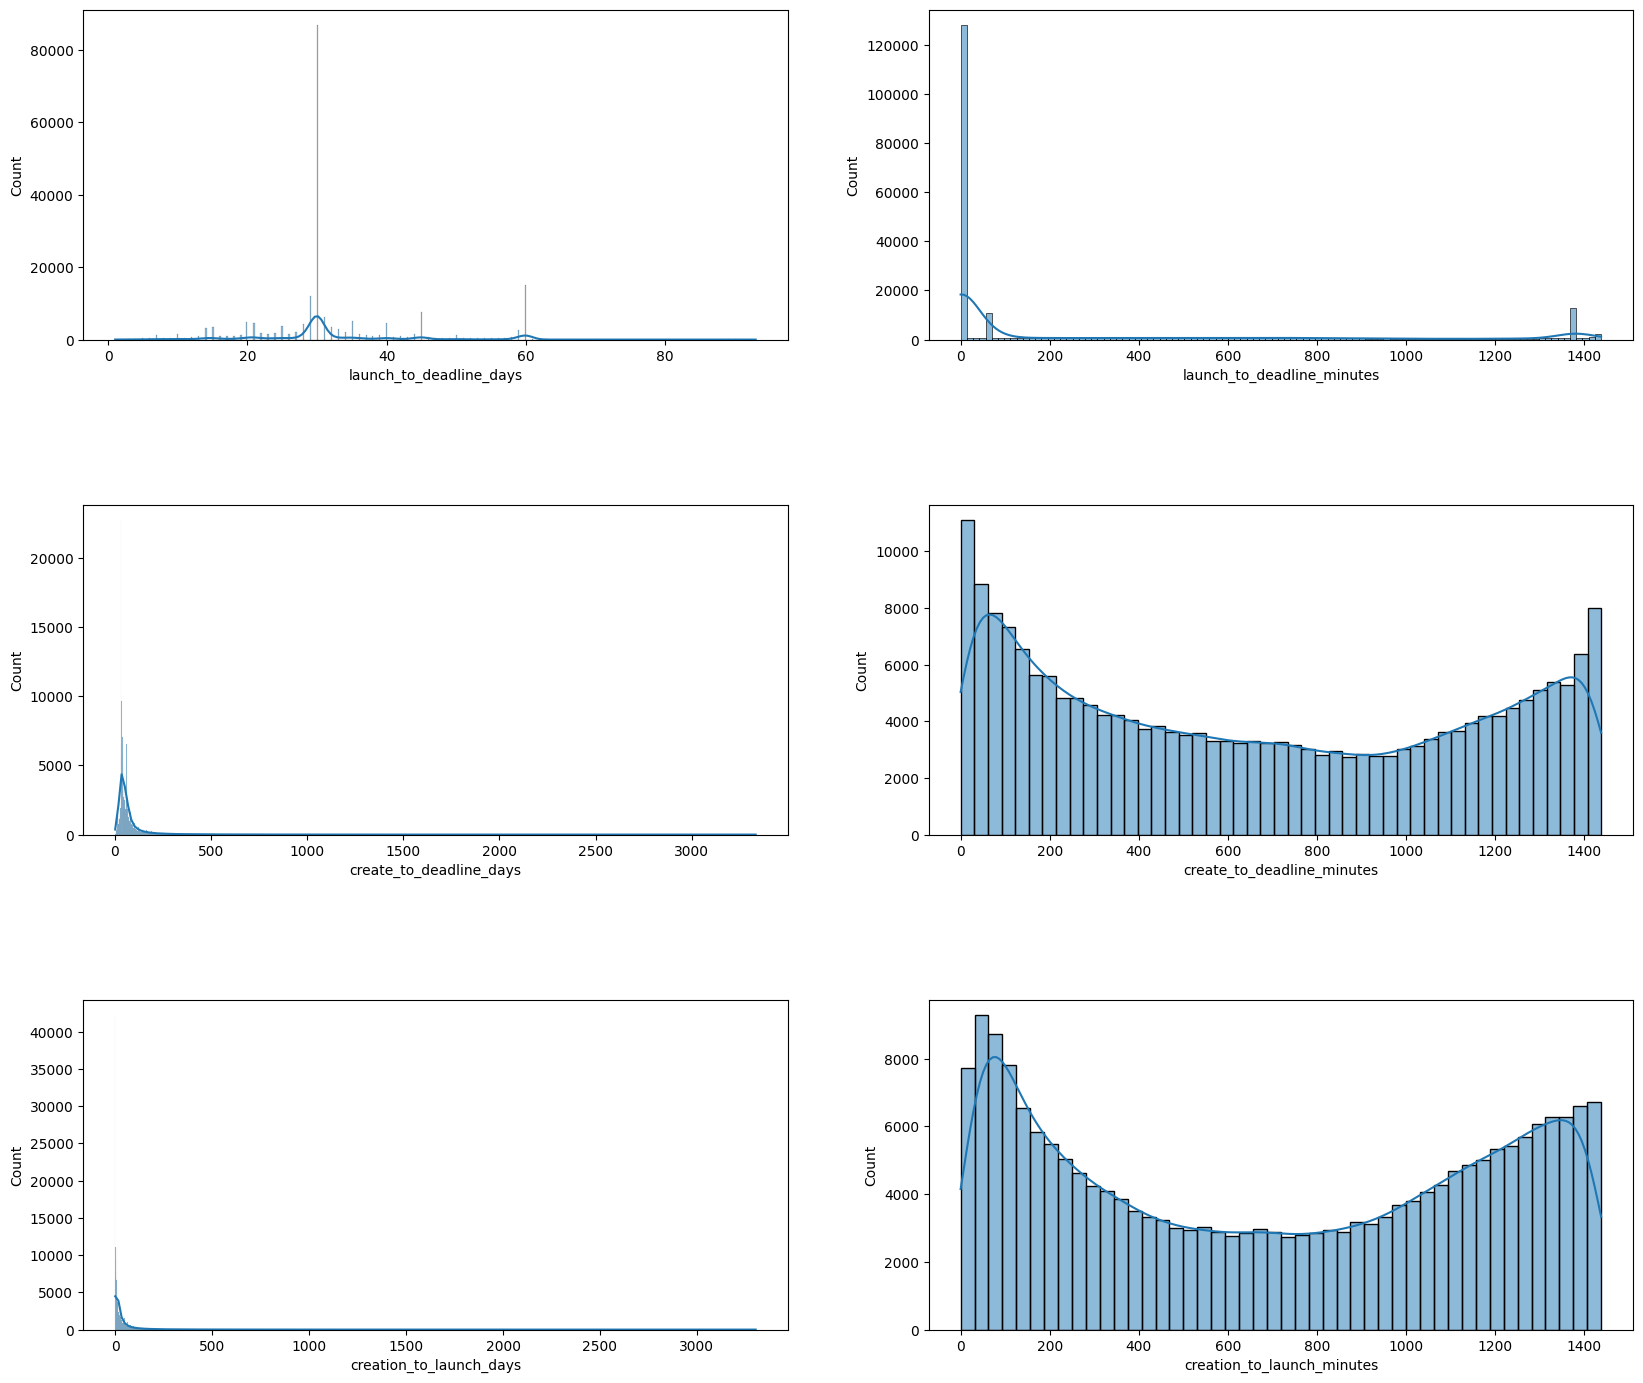

In [56]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in time_df.columns.tolist():
    plt.subplot(5,2,i)
    sns.histplot(data=time_df, x=name,kde=True)
    i = i + 1